**Brian Blaylock**  
**February 6, 2019**

# Read HRRR-GLM Lightning Hit Rates

- **How do distributions different for other regions? (western USA?)**
- Is Reflectivity a better predictor (probably not, since lightning is generally the area of strongest reflectivity. The only thing this would do is expand the radius of convective areas.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os


import os
SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)
    
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [102]:
months = ['May', 'Jun', 'Jul', 'Aug', 'Sep']

In [185]:
hour = 0

data_dict = {}
for m in months:
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/'
    FILE = 'GLM_in_HRRR_%s-2018_h%02d.csv' % (m, hour)
    if os.path.exists(DIR+FILE):
        data_dict[m] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None)        

print(data_dict.keys())

dict_keys(['May', 'Jun', 'Jul', 'Aug', 'Sep'])


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [174]:
data_dict['May'].dtype.names

('DATE',
 'GLM_FLASH_COUNT',
 'FILES',
 'EXPECTED',
 'F00',
 'F01',
 'F02',
 'F03',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18')

In [222]:
violin_parts.keys()

dict_keys(['bodies', 'cmaxes', 'cmins', 'cbars', 'cmedians'])

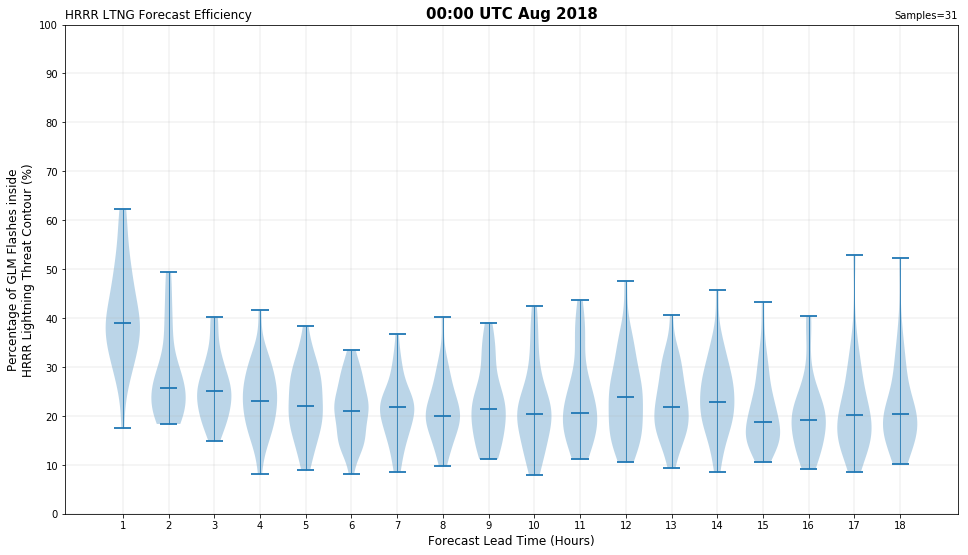

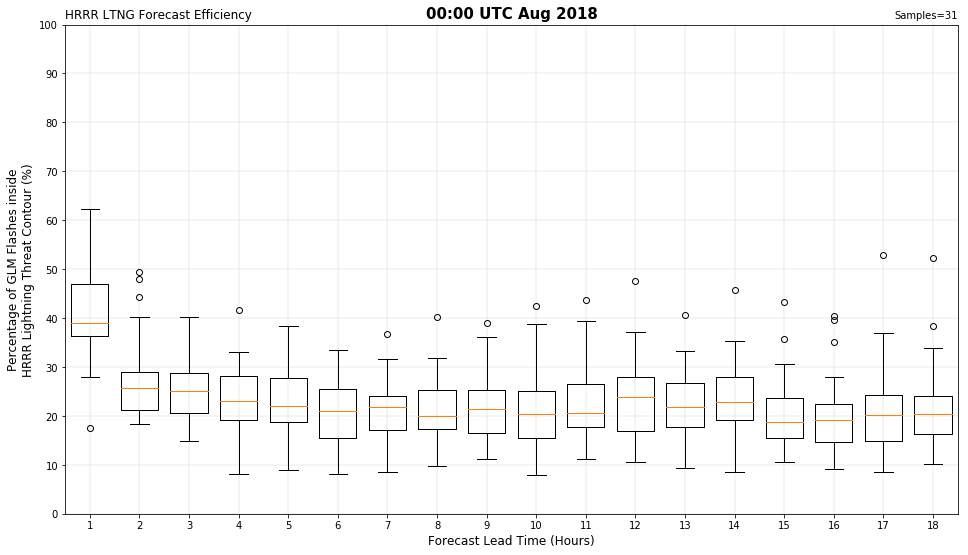

In [250]:
MONTH = 'Aug'

boxes = [data_dict[MONTH]['F%02d'%f]*100 for f in range(1,19)]
boxes = [i[~np.isnan(i)] for i in boxes] # filter out nan values
data = np.array(boxes)


plt.figure(1, figsize=(16,9))
v = plt.violinplot(boxes, showmedians=True, showmeans=False, widths=.75);
#for vp in v['bodies']:
#    vp.set_facecolor('k')
#    vp.set_edgecolor('k')
#    vp.set_alpha(0.5)
#v['cbars'].set_color('k');
v['cbars'].set_linewidth(.8);
#v['cmaxes'].set_color('k')
#v['cmins'].set_color('k')
#v['cmedians'].set_color('k')
#for i in range(len(a['DATE'])):
#    plt.plot(range(1,19), data[:,i])
plt.title('HRRR LTNG Forecast Efficiency', loc='left', fontsize=12)
plt.title('%02d:00 UTC %s 2018' % (hour, MONTH), loc='center', fontweight='semibold')
plt.title('Samples=%s' % len(data_dict[MONTH]['DATE']), loc='right', fontsize=10)
plt.xlabel('Forecast Lead Time (Hours)')
plt.ylabel('Percentage of GLM Flashes inside\nHRRR Lightning Threat Contour (%)')
plt.ylim([0,100])
plt.yticks(range(0,101,10))
plt.xticks(range(1,19))
plt.grid()
#plt.savefig(SAVEDIR + "HRRR_GLM_%s_%s" % (MONTH, hour))


plt.figure(2, figsize=(16,9))
plt.boxplot(boxes, widths=.75);
#for i in range(len(a['DATE'])):
#    plt.plot(range(1,19), data[:,i])
plt.title('HRRR LTNG Forecast Efficiency', loc='left', fontsize=12)
plt.title('%02d:00 UTC %s 2018' % (hour, MONTH), loc='center', fontweight='semibold')
plt.title('Samples=%s' % len(data_dict[MONTH]['DATE']), loc='right', fontsize=10)

plt.xlabel('Forecast Lead Time (Hours)')
plt.ylabel('Percentage of GLM Flashes inside\nHRRR Lightning Threat Contour (%)')
plt.ylim([0,100])
plt.yticks(range(0,101,10))
plt.xticks(range(1,19))
plt.grid()

(0, 100000)

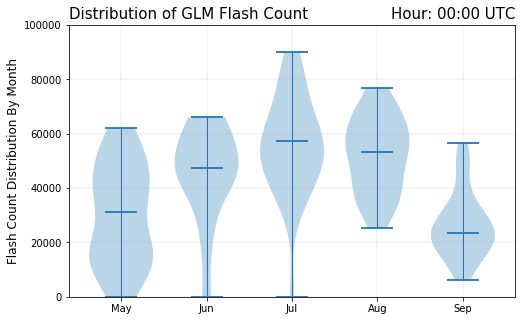

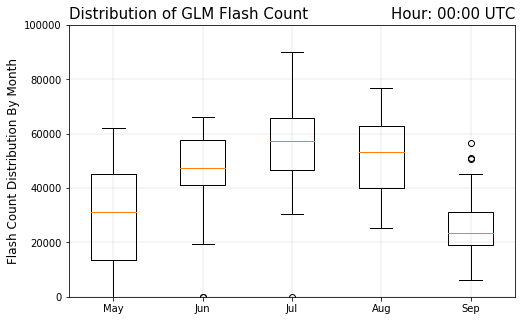

In [239]:
counts = [data_dict[MONTH]['GLM_FLASH_COUNT'] for MONTH in data_dict.keys()]


plt.figure(1, figsize=[8,5])
plt.title("Distribution of GLM Flash Count", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Flash Count Distribution By Month')
v = plt.violinplot(counts, showmedians=True, widths=.75);
v['cbars'].set_linewidth(1)
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());
plt.grid()
plt.ylim([0,100000])
plt.savefig(SAVEDIR+'GLM_Flash_Count_Distribtuion_%02d00-UTC' % hour)

plt.figure(2, figsize=[8,5])
plt.title("Distribution of GLM Flash Count", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Flash Count Distribution By Month')
plt.boxplot(counts);
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());
plt.grid()
plt.ylim([0,100000])

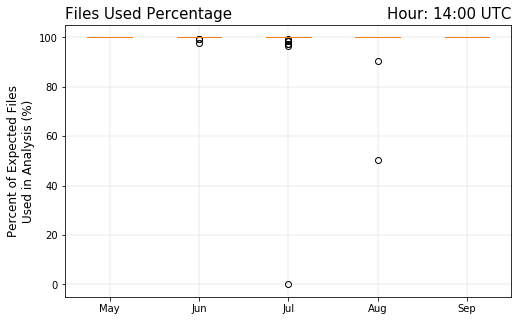

In [177]:
files_present = np.array([data_dict[MONTH]['FILES'] for MONTH in data_dict.keys()])
files_expected = np.array([data_dict[MONTH]['EXPECTED'] for MONTH in data_dict.keys()])

files_percentage = [p/files_expected[i]*100 for i,p in enumerate(files_present)]

plt.figure(1, figsize=[8,5])
plt.title("Files Used Percentage", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Percent of Expected Files\nUsed in Analysis (%)')
plt.boxplot(files_percentage);
plt.xticks(range(1,1+len(data_dict.keys())), data_dict.keys());
plt.grid()